# Buck Converter with L-C input filter

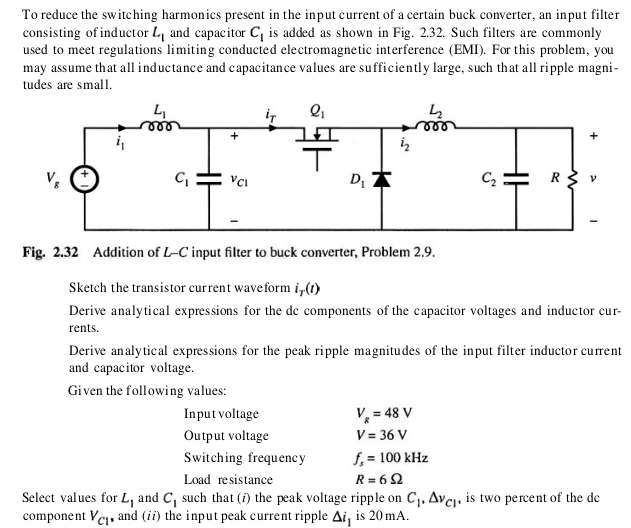

#### The input filter in the problem statement is entirely undamped, and that is not a very realistic circuit to use in real life. The filter cap voltage will exhibit a lot of ringing when the top switch opens (Q1 above). So, let's include some damping elements in the analysis:

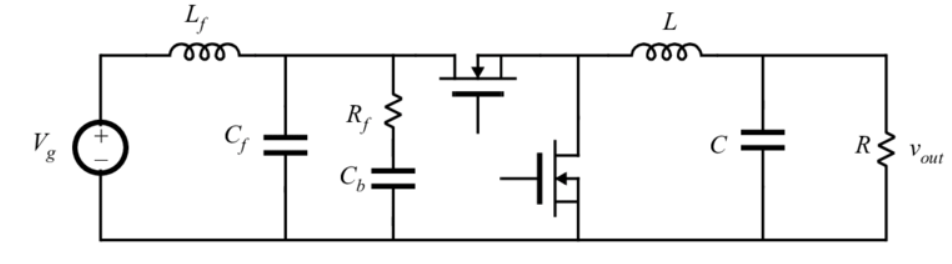

#### Above shows the circuit for the following analysis. The goal is to create a framework for analysing the circuit that will enable easy designs, and a means of testing design choices (simulating). The problem statement above give some rough numbers to start with, and says that all ripple magnitudes are sufficiently small, such that the small ripple approximation may be made. 

#### The small-ripple approximation, applied to the input filter, predicts zero L1 ripple current. This is because both side of the inductor are connected to nodes with the same DC value. The filter capacitor does see different currents between parts of the cycle: L1 current for 0<t<DTs, and L1 + L2 current for DTs < t < Ts (ignoring Rf and Cb current)

#### If one first accounts for the different filter capacitor currents, from different switch states, to determine varying capacitor voltage, and then writing down the input filter inductor ripple current, the result is a system of differential equations. This method becomes intractible, and it makes more sense to use a state-space representation. 

In [1]:
import sympy
from sympy.core.symbol import symbols, Symbol

from sympy.printing import latex, pprint
from sympy import Symbol, simplify
from sympy import Matrix
from sympy import dsolve, Function, Derivative, integrate, diff
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter

from math import log10
from PyLTSpice import LTSpice_RawRead

import logging
from ipywidgets import FloatSlider, interact, interactive
from converter5 import *

from control import *

Found Numpy. WIll be used for storing data


In [33]:

periods = 3
samples_per_period = 25
fs = 10
ts = 1/fs
d=.4
t = np.linspace(0, ts*periods, periods*samples_per_period)

x_sim = np.zeros(samples_per_period*periods)
indices = np.array(range(samples_per_period*periods))

In [34]:
 y = np.sin(t*2*np.pi*fs)

In [35]:
for p in range(periods):
    d_idx_s = p*samples_per_period
    d_idx_f = int(d*samples_per_period+d_idx_s)
    dp_idx_s = d_idx_f
    dp_idx_f = (p+1)*samples_per_period
    
    td = t[d_idx_s:d_idx_f] #doesn't actually include d_idx_f!
    tdp = t[dp_idx_s-1:dp_idx_f+1]

    x_sim[d_idx_s:d_idx_f] = np.sin(td*2*np.pi*fs)
    x_sim[dp_idx_s-1:dp_idx_f+1] = np.sin(tdp*2*np.pi*fs) 
 
    

In [36]:
%matplotlib qt
fig, ax = plt.subplots(subplot_kw={'title':'Control!'}, figsize=(6,3.5))
ax.plot(indices, y)
ax.plot(indices, x_sim, linestyle='none', marker='*')